<a href="https://colab.research.google.com/github/kfapohunda1/Projects-and-fundamentals/blob/main/2006_Pike's_Peak_10K_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


LOAD AND READ DATA 

In [196]:
# Open and read files into pandas 

df_m= pd.read_pickle('maleracers.txt')
df_f= pd.read_pickle('femaleracers.txt')
df_fm=pd.read_pickle('totalracers.txt')

In [197]:
df_m.shape

(1261, 18)

PROCESSING AND EXPLORING DATA

In [142]:
print(df_fm.shape)

(2362, 18)


In [198]:
df_fm.isnull().sum(),df_f.isnull().sum()


(Place           0
 Div/Tot         0
 Number          0
 Name            0
 Age             0
 Hometown        0
 Gun Tim         0
 Net Tim         0
 Pace            0
 Division        0
 Gun_Time        0
 Net_Time        0
 Net_Time1       0
 Gun_Time1       0
 Gun_Net_Diff    0
 Div             0
 Total_Racers    0
 Gender          0
 dtype: int64, Place           0
 Div/Tot         0
 Number          0
 Name            0
 Age             0
 Hometown        0
 Gun Tim         0
 Net Tim         0
 Pace            0
 Division        0
 Gun_Time        0
 Net_Time        0
 Net_Time1       0
 Gun_Time1       0
 Gun_Net_Diff    0
 Div             0
 Total_Racers    0
 Gender          0
 dtype: int64)

In [200]:
df_f.dropna(axis=0, inplace=True)

df_m.dropna(axis=0, inplace=True)

df_f.Age.value_counts().sort_index().head()

df_m.Age.value_counts().sort_index().head()

9.0      1
10.0     1
11.0     1
12.0     6
13.0    10
Name: Age, dtype: int64

In [135]:
df_fm.head()

,Place,Div/Tot,Number,Name,Age,Hometown,Gun Tim,Net Tim,Pace,Division,Gun_Time,Net_Time,Net_Time1,Gun_Time1,Gun_Net_Diff,Div,Total_Racers,Gender
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47,4.38,20-29,0:28:48,0:28:47,1900-01-01 00:28:47,1900-01-01 00:28:48,0 days 00:00:01,1,48,male
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10,4.42,20-29,0:29:11,0:29:10,1900-01-01 00:29:10,1900-01-01 00:29:11,0 days 00:00:01,2,48,male
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37,4.46,20-29,0:29:38,0:29:37,1900-01-01 00:29:37,1900-01-01 00:29:38,0 days 00:00:01,3,48,male
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46,4.48,20-29,0:29:46,0:29:46,1900-01-01 00:29:46,1900-01-01 00:29:46,0 days 00:00:00,1,96,male
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4.55,20-29,0:30:31,0:30:30,1900-01-01 00:30:30,1900-01-01 00:30:31,0 days 00:00:01,4,48,male


In [68]:
df_fm.dtypes

Place                    object
Div/Tot                  object
Number                   object
Name                     object
Age                     float64
Hometown                 object
Gun Tim                  object
Net Tim                  object
Pace                    float64
Division                 object
Gun_Time                 object
Net_Time                 object
Net_Time1        datetime64[ns]
Gun_Time1        datetime64[ns]
Gun_Net_Diff    timedelta64[ns]
Div                      object
Total_Racers              int64
Gender                   object
dtype: object

In [72]:
# Define Gun time and Net time
df_time = df_total[['Place','Number','Name','Age','Hometown','Pace','Net_Time1', 'Gun_Time1',
       'Gun_Net_Diff', 'Division','Gender']]
#Create time variables 
df_time['g_hour'] = df_time['Gun_Time1'].dt.hour
df_time['g_minute'] = df_time['Gun_Time1'].dt.minute
df_time['g_second'] = df_time['Gun_Time1'].dt.second

df_time['n_hour'] = df_time['Net_Time1'].dt.hour
df_time['n_minute'] = df_time['Net_Time1'].dt.minute
df_time['n_second'] = df_time['Net_Time1'].dt.second



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Place,Number,Name,Age,Hometown,Pace,Net_Time1,Gun_Time1,Gun_Net_Diff,Division,Gender,g_hour,g_minute,g_second,n_hour,n_minute,n_second
414,415,2987,Eric Delgado,29.0,Wheaton MD,7.40,1900-01-01 00:47:35,1900-01-01 00:48:56,0 days 00:01:21,20-29,male,0,48,56,0,47,35
799,800,2414,Matt Seubert,36.0,Germantown MD,8.45,1900-01-01 00:54:22,1900-01-01 00:59:43,0 days 00:05:21,30-39,male,0,59,43,0,54,22
44,625,581,Melinda Berge,61.0,Annapolis MD,9.30,1900-01-01 00:59:00,1900-01-01 01:00:02,0 days 00:01:02,60-69,female,1,0,2,0,59,0
713,106,2528,Susan Spicer,43.0,Rockville MD,7.33,1900-01-01 00:46:50,1900-01-01 00:48:10,0 days 00:01:20,40-49,female,0,48,10,0,46,50
658,659,2583,Doug Sullivan,44.0,Clarksville MD,8.20,1900-01-01 00:51:42,1900-01-01 00:55:18,0 days 00:03:36,40-49,male,0,55,18,0,51,42


In [81]:
# Calculate time for hours, minutes and seconds
df_time['g_total_time'] = round(((df_time['g_hour']*60)+df_time['g_minute']+(df_time['g_second']/60)),2)
df_time['n_total_time'] = round(((df_time['n_hour']*60)+df_time['n_minute']+(df_time['n_second']/60)),2)

QUESTION 1: What are the mean, median, mode, and
range of the race results for all racers by
gender?

In [82]:
# 1. Finding the mean, median, mode and range 

df_time.describe()

,Age,Pace,Gun_Net_Diff,g_hour,g_minute,g_second,n_hour,n_minute,n_second,g_total_time,n_total_time
count,2362.000000,2362.00000,2362,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000
mean,39.040644,8.66876,0 days 00:02:50.948348856,0.411939,32.703641,29.848857,0.256139,39.200677,29.958933,57.917472,55.068370
std,11.578692,1.65269,0 days 00:01:34.957440919,0.492288,22.033210,17.398669,0.436592,19.785560,17.427663,11.420600,10.281547
min,1.000000,4.38000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.800000,28.780000
25%,31.000000,7.47000,0 days 00:01:16,0.000000,8.000000,15.000000,0.000000,30.250000,16.000000,50.255000,48.290000
50%,39.000000,8.45500,0 days 00:03:16,0.000000,43.000000,31.000000,0.000000,48.000000,30.000000,57.665000,54.375000
75%,46.000000,9.41000,0 days 00:03:49.750000,1.000000,53.000000,45.000000,1.000000,54.000000,44.750000,64.020000,60.165000
max,84.000000,17.12000,0 days 00:09:20,1.000000,59.000000,59.000000,1.000000,59.000000,59.000000,110.520000,106.820000


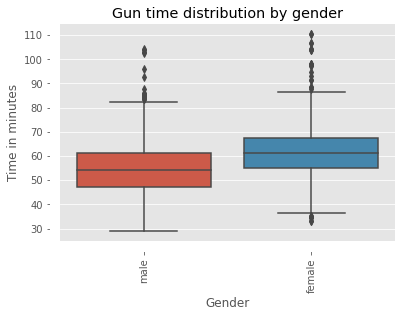

In [84]:
# Box plot of female vs. Male racers (Gun Time)
ax = plt.axes()
plot1 = sns.boxplot(data=df_time, x='Gender', y='g_total_time')
ax.set_title("Gun time distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.show()

In [89]:
# calculate mode  for females  (Guntime) 
df_time[df_time['Gender']=='female']['g_total_time'].value_counts(ascending=False).head(2)


61.78    5
62.67    5
Name: g_total_time, dtype: int64

In [88]:
# calculate Interquartile range  for females (Guntime )
round(df_time[df_time['Gender'] =='female']['g_total_time'].quantile(.25),2),round(df_time[df_time['Gender']=='female']['g_total_time'].quantile(.75),2)

(54.92, 67.53)

In [93]:
# calculate median for females (Guntime )

round(df_time[df_time['Gender']=='female']['g_total_time'].quantile(.5),2)


61.33

In [91]:
# calculate mode  for males (Guntime)
df_time[df_time['Gender']!='female']['g_total_time'].value_counts(ascending=False).head(3)

55.22    5
64.93    5
60.18    4
Name: g_total_time, dtype: int64

In [92]:
# calculate Interquartile range  for males (Guntime )
round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.25),2),round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.75),2)

(47.0, 61.12)

In [ ]:
# calculate median  for males (Guntime )

round(df_time[df_time['Gender']!='female']['g_total_time'].quantile(.5),2)


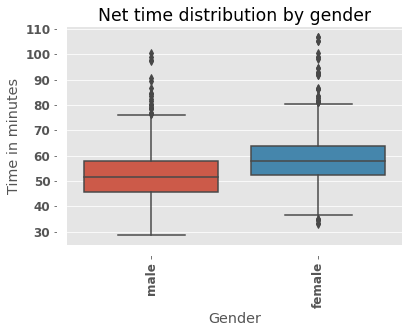

In [96]:
# Box plot of female vs. Male racers (Net Time)

ax = plt.axes()
plot1 = sns.boxplot(data=df_time, x='Gender', y='n_total_time')
ax.set_title("Net time distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

plt.show()

In [97]:

# Interquartile Calculations for females (Nettime)
round(df_time[df_time['Gender'] =='female']['n_total_time'].quantile(.25),2),round(df_time[df_time['Gender']=='female']['n_total_time'].quantile(.75),2)

(52.22, 63.6)

In [100]:
#Mode calculation for females(Net Time)
round(df_time[df_time['Gender']=='female']['n_total_time'].quantile(.5),2)

57.82

In [102]:
#Mode calculation for males(Net Time)
round(df_time[df_time['Gender']!='female']['n_total_time'].quantile(.5),2)

51.37

In [105]:
# Interquartile Calculations for males (Nettime)
round(df_time[df_time['Gender'] !='female']['n_total_time'].quantile(.25),2),round(df_time[df_time['Gender']!='female']['n_total_time'].quantile(.75),2)

(45.68, 57.82)

In [112]:
#Mean and median for  Gun time by Gender
round(df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median]),2)


,mean,median
Gender,,
female,61.70,61.33
male,54.62,54.30


In [113]:
#Mean and median for  Net time by Gender
round(df_time.groupby('Gender')['n_total_time'].agg([np.mean,np.median]),2)


,mean,median
Gender,,
female,58.45,57.82
male,52.12,51.37


QUESTION 2: Analyze the difference between gun and net
time race results.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


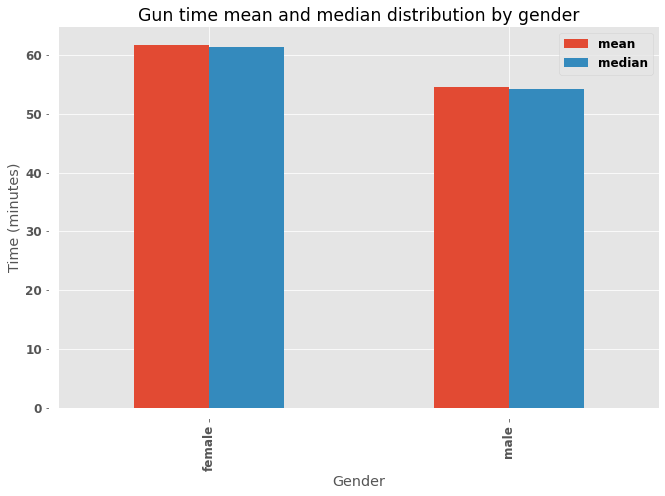

In [108]:
# Chart of mean and median for Gun Time
plot1= df_time.groupby('Gender')['g_total_time'].agg([np.mean,np.median]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (10.75, 7.0)
ax = plt.axes()
ax.set_title("Gun time mean and median distribution by gender")
ax.set_ylabel('Time (minutes)')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

,mean,median
Gender,,
female,58.45,57.82
male,52.12,51.37


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


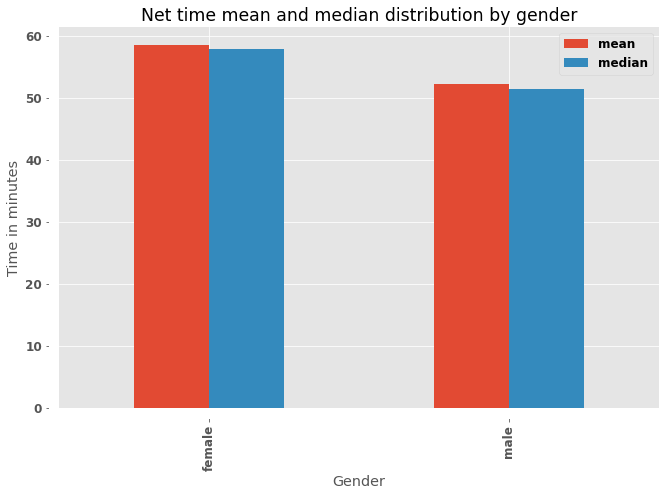

In [110]:
# Chart of mean and median for Net Time
plot1= df_time.groupby('Gender')['n_total_time'].agg([np.mean,np.median]).plot(kind='bar')
plt.rcParams['figure.figsize'] = (8.75, 7.0)
ax = plt.axes()
ax.set_title("Net time mean and median distribution by gender")
ax.set_ylabel('Time in minutes')
ax.set_xlabel('Gender')
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.show()

In [114]:
df_fm.head()

,Place,Div/Tot,Number,Name,Age,Hometown,Gun Tim,Net Tim,Pace,Division,Gun_Time,Net_Time,Net_Time1,Gun_Time1,Gun_Net_Diff,Div,Total_Racers,Gender
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47,4.38,20-29,0:28:48,0:28:47,1900-01-01 00:28:47,1900-01-01 00:28:48,0 days 00:00:01,1,48,male
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10,4.42,20-29,0:29:11,0:29:10,1900-01-01 00:29:10,1900-01-01 00:29:11,0 days 00:00:01,2,48,male
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37,4.46,20-29,0:29:38,0:29:37,1900-01-01 00:29:37,1900-01-01 00:29:38,0 days 00:00:01,3,48,male
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46,4.48,20-29,0:29:46,0:29:46,1900-01-01 00:29:46,1900-01-01 00:29:46,0 days 00:00:00,1,96,male
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4.55,20-29,0:30:31,0:30:30,1900-01-01 00:30:30,1900-01-01 00:30:31,0 days 00:00:01,4,48,male


In [202]:
#Convert Gun_Net_Diff to seconds 

df_fm['df_sec']=df_fm.Gun_Net_Diff/ np.timedelta64(1, 's')
df_fm.head(3)

,Place,Div/Tot,Number,Name,Age,Hometown,Gun Tim,Net Tim,Pace,Division,Gun_Time,Net_Time,Net_Time1,Gun_Time1,Gun_Net_Diff,Div,Total_Racers,Gender,df_sec
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47,4.38,20-29,0:28:48,0:28:47,1900-01-01 00:28:47,1900-01-01 00:28:48,0 days 00:00:01,1,48,male,1.0
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10,4.42,20-29,0:29:11,0:29:10,1900-01-01 00:29:10,1900-01-01 00:29:11,0 days 00:00:01,2,48,male,1.0
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37,4.46,20-29,0:29:38,0:29:37,1900-01-01 00:29:37,1900-01-01 00:29:38,0 days 00:00:01,3,48,male,1.0


<function matplotlib.pyplot.show>

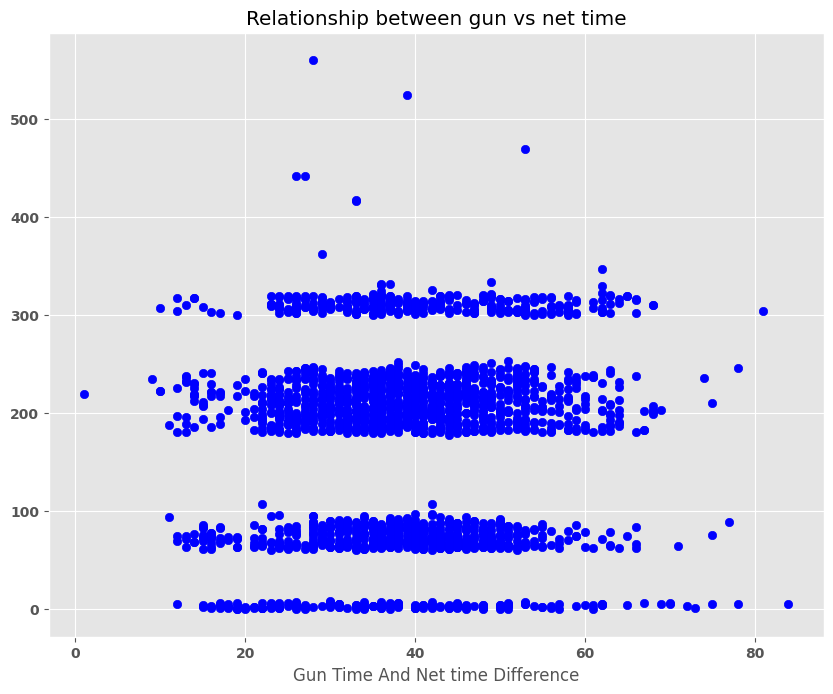

In [203]:
#Visual analysis to identify  trends or relationship between gun and net time. 
plt.figure(figsize=(10, 8), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_fm['Age'],df_fm['df_sec'], c='b')
plt.xlabel('Gun Time And Net time Difference')
plt.title("Relationship between gun vs net time");
plt.show

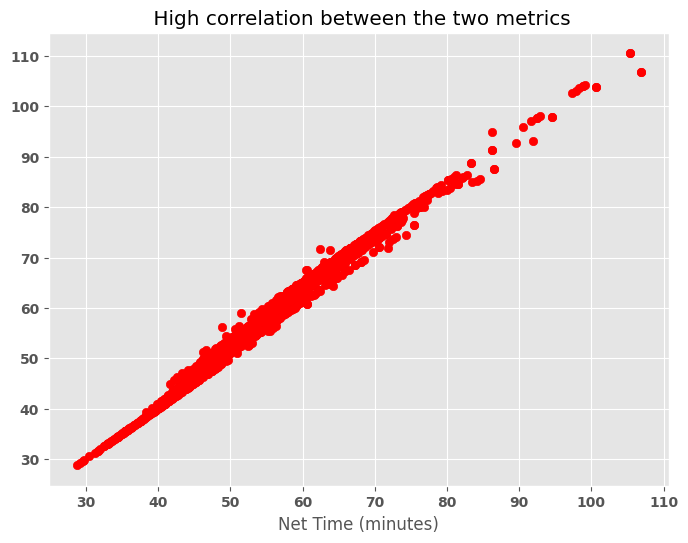

In [206]:
#Linear regression to Identify trends

plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(df_time['n_total_time'],df_time['g_total_time'], c='r')
plt.xlabel('Net Time (minutes)')
plt.title(" High correlation between the two metrics");




This chart shows a high correlation between Gun and Net time.

QUESTION 3: How much time separates Chris Doe from
the top 10 percentile of racers of the same
division?

In [155]:
#I dentify Chris Doe
df_time[df_time['Name']=="Chris Doe"]

,Place,Number,Name,Age,Hometown,Pace,Net_Time1,Gun_Time1,Gun_Net_Diff,Division,Gender,g_hour,g_minute,g_second,n_hour,n_minute,n_second,g_total_time,n_total_time
534,535,2869,Chris Doe,44.0,Reson VA,8.0,1900-01-01 00:49:43,1900-01-01 00:53:07,0 days 00:03:24,40-49,male,0,53,7,0,49,43,53.12,49.72


In [159]:
print('df_time[df_time['Name']=="Chris Doe"]['n_total_time']-(df_time[(df_time['Division']=="40-49") &(df_fm['Gender']=="male")]['n_total_time'].quantile(0.1)))

534    8.03
Name: n_total_time, dtype: float64


In [ ]:
#Chris Doe is ranked 534 out of 1216 and he is seperated by 8.03 minutes from the top 10 percentile

4. Compare the race results of each division.

In [175]:
df_time['Division'].value_counts().sort_index()

14 or less     39
15-19          71
20-29         372
30-39         766
40-49         698
50-59         309
60-69          93
70-79          12
over 80         2
Name: Division, dtype: int64

In [176]:
df_time[df_time['Gender']!='male']['Division'].value_counts().sort_index()


14 or less     13
15-19          26
20-29         228
30-39         420
40-49         283
50-59         104
60-69          24
70-79           3
Name: Division, dtype: int64

In [177]:

ax = sns.barplot(x="Division", y="Pace", hue="Gender", data=df)
plt.rcParams['figure.figsize'] = (8.75, 7.0);
plt.title ('Pace distribution by division')
plt.ylabel('Pace (min/mile)');

NameError: ignored

TypeError: ignored

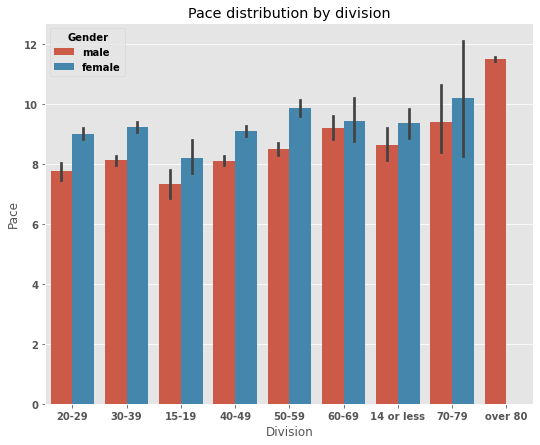

In [183]:

ax = sns.barplot(x="Division", y="Pace", hue="Gender", data=df_time)
plt.rcParams['figure.figsize'] = (8.75, 7.0);
plt.title ('Pace distribution by division')
plt.ylabel('Pace (min/mile)');
plt.show

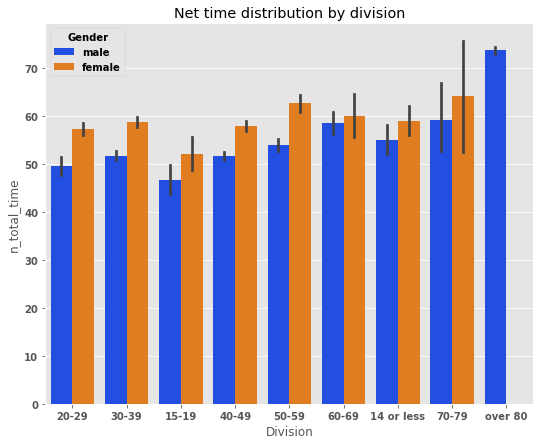

In [184]:
ax = sns.barplot(x="Division", y="n_total_time", hue="Gender", data=df_time,palette="bright")
plt.rcParams['figure.figsize'] = (8.75, 7.0);
plt.title ('Net time distribution by division');

Text(0.5, 1.0, 'Best division by Gun time')

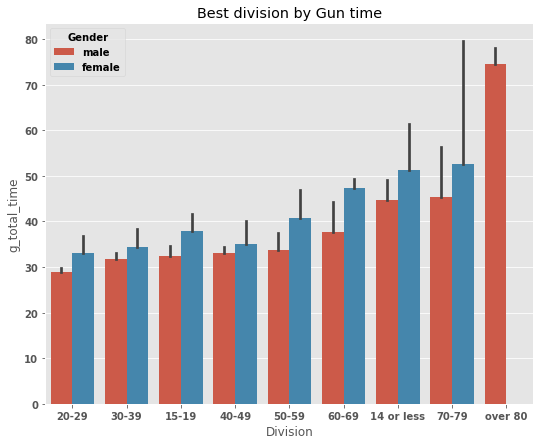

In [186]:
ax = sns.barplot(x="Division", y="g_total_time", hue="Gender", data=df_time, estimator=np.min)
plt.title ('Best division by Gun time')


Text(0.5, 1.0, 'Best division distribution by Net Time')

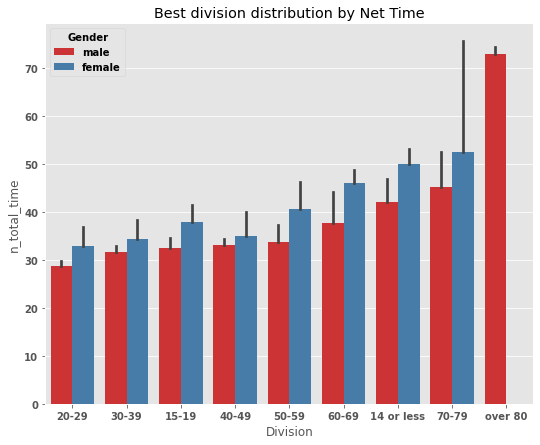

In [190]:

ax = sns.barplot(x="Division", y="n_total_time", hue="Gender", data=df_time, estimator=np.min,palette="Set1")
plt.title ('Best division distribution by Net Time')



Text(0.5, 1.0, 'Participants distribution by division')

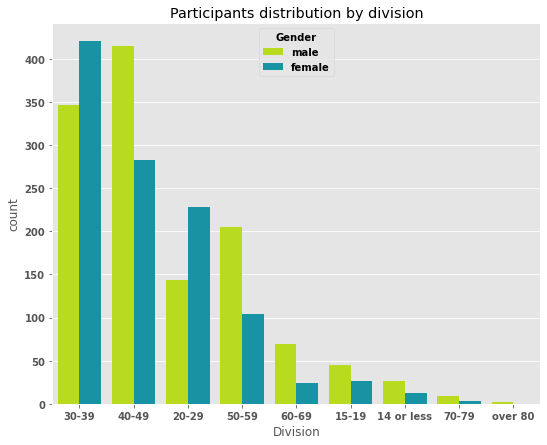

In [194]:
ax = sns.countplot(x="Division", data=df_time,hue='Gender',palette="nipy_spectral_r",
order = df_time['Division'].value_counts().index)
plt.title ('Participants distribution by division')
